-----------------------
#### Simple intuition on MSE 
- with respect to coeffs
-----------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [2]:
# Generate random data
np.random.seed(0)

X = np.random.rand(50) * 10
y = 2 * X + 3 + np.random.randn(50) * 2

In [3]:
# Reshape X to a 2D array
X = X.reshape(-1, 1)

In [4]:
# Perform linear regression using scikit-learn
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [5]:
# Get the coefficients (slope and intercept)
b1 = regressor.coef_[0]
b0 = regressor.intercept_

In [6]:
# Calculate predicted values
y_pred = regressor.predict(X)

In [7]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

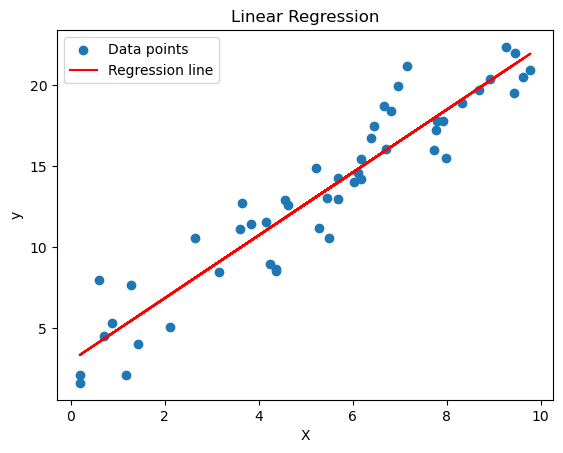

Intercept (b0): 2.9855798317394413
Slope (b1): 1.9385465894619054
Mean Squared Error: 3.422110274722347


In [8]:
# Plot the data and regression line
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1}")
print(f"Mean Squared Error: {mse}")

In [9]:
b0, b1

(2.9855798317394413, 1.9385465894619054)

In [10]:
# Calculate Mean Squared Error (MSE) for various b0 and b1 values
b0_vals = np.linspace(-40, 40, 100)
b1_vals = np.linspace(0, 8,    100)

mse_vals = np.zeros((len(b0_vals), len(b1_vals)))

In [11]:
for i, b0 in enumerate(b0_vals):
    for j, b1 in enumerate(b1_vals):
        y_pred = b0 + b1 * X
        mse_vals[i, j] = mean_squared_error(y, y_pred)

In [14]:
np.argmin(mse_vals)

5324

In [15]:
np.unravel_index(np.argmin(mse_vals), mse_vals.shape)

(53, 24)

In [16]:
# Find minimum MSE point
min_mse_idx = np.unravel_index(np.argmin(mse_vals), mse_vals.shape)

min_mse_b0 = b0_vals[min_mse_idx[0]]
min_mse_b1 = b1_vals[min_mse_idx[1]]

min_mse = mse_vals[min_mse_idx]

In [18]:
from mpl_toolkits.mplot3d import Axes3D

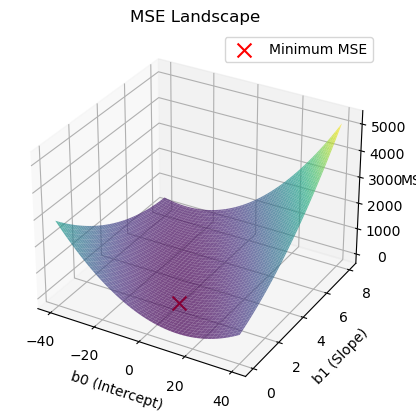

Minimum MSE Point: b0 = 2.8282828282828305, b1 = 1.9393939393939394, MSE = 3.445444663784466


In [19]:
# Plot the 3D surface plot
b0_grid, b1_grid = np.meshgrid(b0_vals, b1_vals)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(b0_grid, b1_grid, mse_vals.T, cmap='viridis', alpha=0.7)
ax.scatter(min_mse_b0, min_mse_b1, min_mse, color='red', marker='x', s=100, label='Minimum MSE')

ax.set_xlabel('b0 (Intercept)')
ax.set_ylabel('b1 (Slope)')
ax.set_zlabel('MSE')
ax.set_title('MSE Landscape')
plt.legend()
plt.show()

print(f"Minimum MSE Point: b0 = {min_mse_b0}, b1 = {min_mse_b1}, MSE = {min_mse}")